In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, AsinhNorm
%matplotlib inline
import galsim
from scipy.optimize import minimize, least_squares
import astropy
from astropy import units as u

In [2]:
# Half-Light Radius
r12_par = 37 # unit in pc
r12_arc = (r12_par * u.parcsec).to(u.arcsec)
print(r12_arc)

#Flux
# Absolute (or Visual Magnitude)
M = -1.49
# Distance from Earth
d = 25 * 10**3 # unit in pc
# Appaent Magnitude
m = M + 5 * np.log10(d) - 5
# Luminosity of Sun
L_not = 3.0128 * 10**28 # unit in Watts
# Luminosity of Tucana III
L_tuciii = 10**(-M/2.5) * L_not # unit in watts
# Flux units in Watts/m^2
flux_w = L_tuciii/(4*np.pi*(d*3.086*10**16)**2)

flux = (flux_w * u.Watt/u.meter**2).to(u.photon/u.centimeter**2/u.second, equivalencies=u.spectral_density(5000 * u.AA))
print(flux)

3.7e-11 arcsec
3.9992803549293545 ph / (s cm2)


In [3]:
# Sersic galaxy
ideal_galaxy = galsim.Sersic(n=0.3,half_light_radius=3.7e-11,flux=3.9992803549293545)

# Next, we'll specify the PSF. This has two components
# Here GalSim is assuming the wavelength is in nm, and the diameter in m.
optical_psf = galsim.OpticalPSF(lam=600,diam=8.4,obscuration=3.4/8.4)

# PSF based on half-light radius
half_light_psf = galsim.Gaussian(half_light_radius=3.7e-11, flux = 3.9992803549293545)

# To actually say what we'd see on the chip, though, we have to provide some information about the detector!
#wcs =galsim.PixelScale() # the argument expected is arcseconds/pixel.

# We're going to add some noise. Most of the noise, for most Rubin galaxies, 
#  is dominated by the sky background, which means the noise is independent of
#  the galaxy properties.
noise = galsim.GaussianNoise(sigma=0.001)

In [4]:
# First, render the ideal, pre-seeing galaxy.
true_image =ideal_galaxy.drawImage()

# Then show what it would look like with a Rubin-like optical PSF.
optical_image = galsim.Convolve([ideal_galaxy,optical_psf]).drawImage()

# Add the atmosphere.
full_psf_image = galsim.Convolve([ideal_galaxy,optical_psf,half_light_psf]).drawImage()

# Then add noise.
noisy_image = full_psf_image.copy()
noise.applyTo(noisy_image)

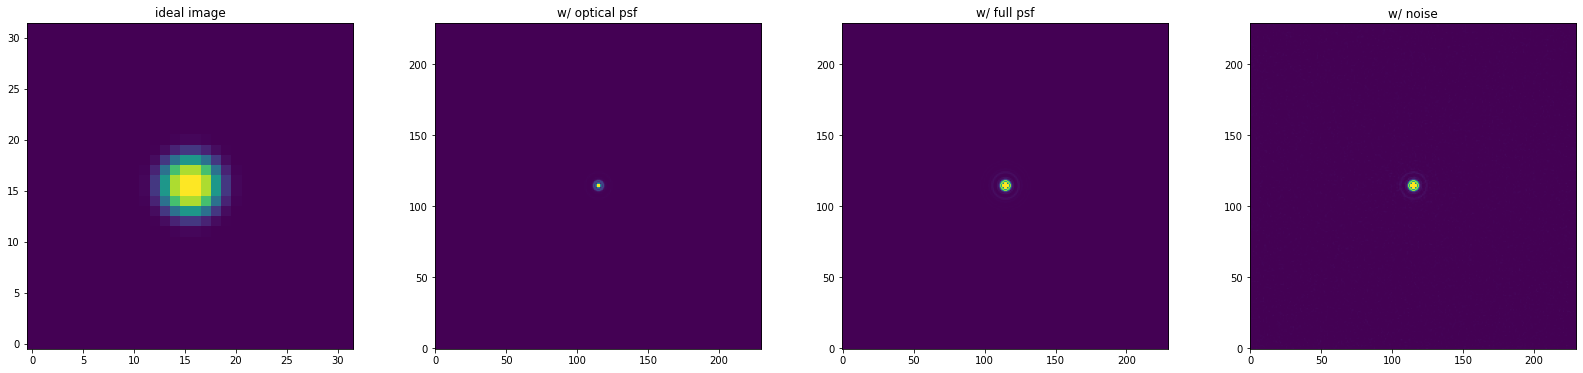

In [5]:
# Plot these all, side-by-side.
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=4,figsize=(28,6))
artist = ax1.imshow(true_image.array,origin='lower')
ax1.set_title("ideal image")
ax2.imshow(optical_image.array,origin='lower',norm=artist.norm)
ax2.set_title("w/ optical psf")
ax3.imshow(full_psf_image.array,origin='lower',norm=artist.norm)
ax3.set_title("w/ full psf")
ax4.imshow(noisy_image.array,origin='lower',norm=artist.norm)
ax4.set_title("w/ noise")
plt.show()